In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("diabetes_dataset.csv")

In [3]:
dataset.head(5)

,PatientID,Age,Gender,BMI,BloodPressure,Insulin,Glucose,DiabetesPedigreeFunction,Outcome
0,1,52,0,30.239636,149,113,115,0.312886,1
1,2,53,1,30.932781,71,39,104,0.389526,0
2,3,21,0,45.092714,161,67,151,1.205869,0
3,4,39,0,47.795530,101,165,184,0.595201,1
4,5,22,1,20.718108,160,158,116,0.974248,1


In [4]:
dataset.isnull().sum()

PatientID                   0
Age                         0
Gender                      0
BMI                         0
BloodPressure               0
Insulin                     0
Glucose                     0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 100 non-null    int64  
 1   Age                       100 non-null    int64  
 2   Gender                    100 non-null    int64  
 3   BMI                       100 non-null    float64
 4   BloodPressure             100 non-null    int64  
 5   Insulin                   100 non-null    int64  
 6   Glucose                   100 non-null    int64  
 7   DiabetesPedigreeFunction  100 non-null    float64
 8   Outcome                   100 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 7.2 KB


In [8]:
dataset.select_dtypes(["int64", "float64"])

,PatientID,Age,Gender,BMI,BloodPressure,Insulin,Glucose,DiabetesPedigreeFunction,Outcome
0,1,52,0,30.239636,149,113,115,0.312886,1
1,2,53,1,30.932781,71,39,104,0.389526,0
2,3,21,0,45.092714,161,67,151,1.205869,0
3,4,39,0,47.795530,101,165,184,0.595201,1
4,5,22,1,20.718108,160,158,116,0.974248,1
...,...,...,...,...,...,...,...,...,...
95,96,28,1,47.903244,164,55,90,0.470471,1
96,97,56,1,34.282756,121,242,74,1.254736,1
97,98,58,0,35.490390,152,206,161,1.378215,0
98,99,60,1,40.044859,85,159,130,0.224376,0


# ⭐ Correlation

• Measures how STRONGLY two variables move togethe

r
• "HOW much do they trend together

?"
• Easy to interpret (standardiz

ed)
• Range: -1 t

o +1
• Answer: "Very strong", "Weak", "None", etc.

In [9]:
dataset.select_dtypes(["int64", "float64"]).corr()

,PatientID,Age,Gender,BMI,BloodPressure,Insulin,Glucose,DiabetesPedigreeFunction,Outcome
PatientID,1.000000,0.089138,0.136866,0.058316,0.094479,0.046126,0.038828,0.008574,-0.090873
Age,0.089138,1.000000,0.062033,0.052678,-0.086470,-0.006319,-0.070034,0.200203,-0.018380
Gender,0.136866,0.062033,1.000000,0.060188,-0.098215,-0.181368,-0.092420,-0.090540,-0.082430
BMI,0.058316,0.052678,0.060188,1.000000,-0.124922,0.024644,0.024035,-0.049573,0.044217
BloodPressure,0.094479,-0.086470,-0.098215,-0.124922,1.000000,-0.106475,0.135543,0.034238,0.043858
Insulin,0.046126,-0.006319,-0.181368,0.024644,-0.106475,1.000000,-0.094054,0.085453,0.153579
Glucose,0.038828,-0.070034,-0.092420,0.024035,0.135543,-0.094054,1.000000,0.068096,-0.086867
DiabetesPedigreeFunction,0.008574,0.200203,-0.090540,-0.049573,0.034238,0.085453,0.068096,1.000000,-0.076869
Outcome,-0.090873,-0.018380,-0.082430,0.044217,0.043858,0.153579,-0.086867,-0.076869,1.000000


In [11]:
data_corr = dataset.select_dtypes(["int64", "float64"]).corr()


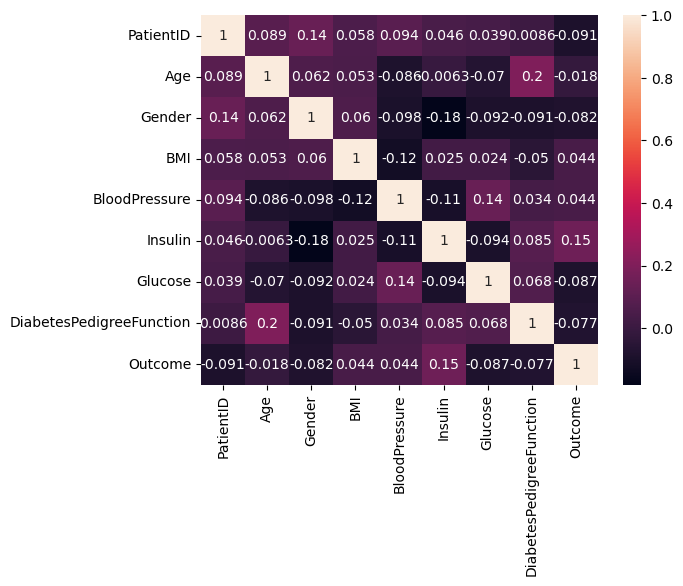

In [14]:
sns.heatmap(data_corr, annot=True)
plt.show()

#  Covariance                                                               

• Measures if two variables move togethe  
?"
• Hard to interpret (depends on uni                                                                     ts)
• Range: -∞ t                                                                            
o +∞
• Answer: "Yes they do" or "No they d             on't"

In [10]:
dataset.select_dtypes(["int64", "float64"]).cov()

,PatientID,Age,Gender,BMI,BloodPressure,Insulin,Glucose,DiabetesPedigreeFunction,Outcome
PatientID,841.666667,45.904040,1.994949,15.831679,87.494949,98.813131,41.116162,0.159659,-1.318182
Age,45.904040,315.087980,0.553232,8.750116,-48.996162,-8.282727,-45.375455,2.281043,-0.163131
Gender,1.994949,0.553232,0.252424,0.282974,-1.575152,-6.728586,-1.694848,-0.029198,-0.020707
BMI,15.831679,8.750116,0.282974,87.566711,-37.315399,17.028336,8.209563,-0.297757,0.206885
BloodPressure,87.494949,-48.996162,-1.575152,-37.315399,1018.966061,-250.971919,157.926667,0.701514,0.700000
Insulin,98.813131,-8.282727,-6.728586,17.028336,-250.971919,5452.477879,-253.497677,4.050161,5.670202
Glucose,41.116162,-45.375455,-1.694848,8.209563,157.926667,-253.497677,1332.288788,1.595389,-1.585354
DiabetesPedigreeFunction,0.159659,2.281043,-0.029198,-0.297757,0.701514,4.050161,1.595389,0.411997,-0.024670
Outcome,-1.318182,-0.163131,-0.020707,0.206885,0.700000,5.670202,-1.585354,-0.024670,0.250000


In [15]:
data_cov = dataset.select_dtypes(["int64", "float64"]).cov()

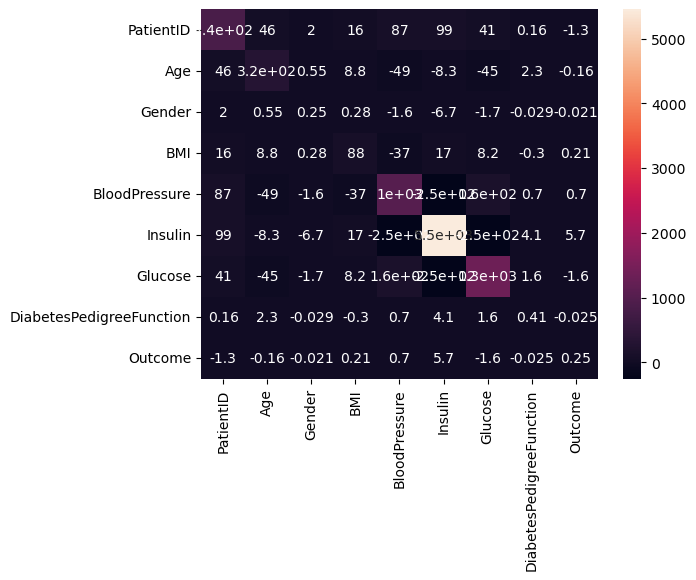

In [16]:
sns.heatmap(data_cov, annot=True)
plt.show()

## 💡 **Simple Analogy:**
Covariance is like asking "Do these things move together?" Correlation is like asking "HOW MUCH do they move together, on a scale of -1 to 1?"

## 🎓 Key Insight:
Correlation is just a "standardized" version of covariance. It removes the effect of units so you can easily compare any two variables.